In [86]:
from main import *
from tqdm import tqdm
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt 


In [87]:
lexicon = pd.read_csv('initial_prob.csv')

In [88]:
df = lexicon
sample_size = min(50,df.shape[0])
sample_idx = (np.linspace(0,df.shape[0]-1,sample_size)).astype(int)
df_sample = df.iloc[sample_idx]
maxVal,minVal = max(df_sample.entropy),min(df_sample.entropy)
fig = px.bar(df_sample, x='word', y='entropy',color='entropy',color_continuous_scale='Bluered',range_color=[minVal,maxVal])
fig.show()

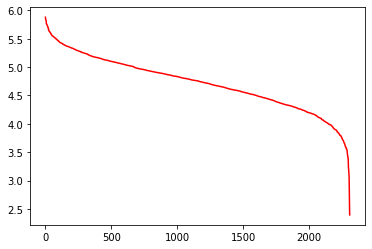

In [4]:
plt.plot(df.entropy,color='red')
x = np.array(df.entropy)


In [89]:
def convert_to_prob(entropy,factor=10):
    prob = np.zeros(len(entropy))
    prob[np.argmax(entropy)]=1.0
    #ent_factor = factor**entropy
    #prob = ent_factor/sum(ent_factor)
    return prob


def compare_words(sel_word,target_word):
    target_word_list = list(target_word)
    sel_word_list = np.array(list(sel_word))
    out = {}
    green_mask = sel_word_list==target_word_list
    target_word_list = list(np.array(target_word_list)[~green_mask])

    yellow_mask = np.zeros([5],dtype=bool)
    for idx_lt,letter in enumerate(sel_word_list):
        if green_mask[idx_lt]:
            yellow_mask[idx_lt]=False
            continue
        lt_bool = letter in target_word_list
        yellow_mask[idx_lt]=lt_bool
        if lt_bool:
            target_word_list.remove(letter)

    grey_mask = ~(yellow_mask.astype(int)+green_mask.astype(int)).astype(bool)
    out['green_mask']=green_mask
    out['yellow_mask']=yellow_mask
    out['grey_mask']=grey_mask
    out['green_letters'] = sel_word_list[green_mask.astype(bool)]
    out['yellow_letters'] = sel_word_list[yellow_mask.astype(bool)]
    out['grey_letters'] = sel_word_list[grey_mask.astype(bool)]
    return out


def play_auto_game(target_word,lexicon):
    df = lexicon
    turns = 0
    game = True
    while game:

        words_dna_digitised = get_words_dna(df['word'])
        df['p'] = convert_to_prob(df['entropy'],factor=30)

        # guessing a word
        sel_word = np.random.choice(df['word'],p=df['p'])
        print('Chosen word: ',sel_word)
    
        # comparing words for a match
        out = compare_words(sel_word,target_word)
        green_mask = out['green_mask']
        yellow_mask = out['yellow_mask']
        grey_mask = out['grey_mask']

        green_letters = out['green_letters']
        yellow_letters = out['yellow_letters']
        grey_letters = out['grey_letters']

        # new lexicon after the move
        red_list = get_red_list(green_mask,green_letters,yellow_mask,yellow_letters,
                            grey_letters,words_dna_digitised,df.word).to_numpy()

        # new entropy for the next move
        df = get_entropy_list(red_list,progress_bar=False)
        turns +=1

        if all(green_mask):
            outcome = True
            break
        if turns==6:
            outcome = False
            break

    if outcome:
        print('Game won in {} turns'.format(turns))
    else:
        print('Game lost.')
        
    return turns


In [90]:
target_word = np.random.choice(lexicon.word)
target_word

'fifty'

In [92]:
turns_history = []
for i in range(30):
    target_word = np.random.choice(lexicon.word)
    print('Target word: ',target_word)
    turns = play_auto_game(target_word,lexicon)
    turns_history.append(turns)
    


Target word:  cramp
Chosen word:  raise
Chosen word:  adorn
Chosen word:  tract
Chosen word:  crawl
Chosen word:  cramp
Game won in 5 turns
Target word:  undue
Chosen word:  raise
Chosen word:  lunge
Chosen word:  undue
Game won in 3 turns
Target word:  suite
Chosen word:  raise
Chosen word:  spine
Chosen word:  slime
Chosen word:  suite
Game won in 4 turns
Target word:  druid
Chosen word:  raise
Chosen word:  droit
Chosen word:  druid
Game won in 3 turns
Target word:  fauna
Chosen word:  raise
Chosen word:  tangy
Chosen word:  naval
Chosen word:  bacon
Chosen word:  fauna
Game won in 5 turns
Target word:  hymen
Chosen word:  raise
Chosen word:  tenet
Chosen word:  woven
Chosen word:  lumen
Chosen word:  hymen
Game won in 5 turns
Target word:  blend
Chosen word:  raise
Chosen word:  tenet
Chosen word:  woven
Chosen word:  blend
Game won in 4 turns
Target word:  lease
Chosen word:  raise
Chosen word:  cease
Chosen word:  tease
Chosen word:  lease
Game won in 4 turns
Target word:  drier


3.466666666666667

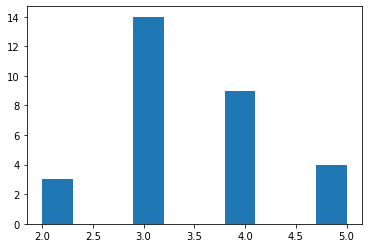

In [93]:
plt.hist(turns_history)
np.mean(turns_history)

In [55]:
# does not work here 'd' should be yellow
compare_words('dodgy','dowdy')



{'green_mask': array([ True,  True, False, False,  True]),
 'yellow_mask': array([False, False,  True, False, False]),
 'grey_mask': array([False, False, False,  True, False]),
 'green_letters': array(['d', 'o', 'y'], dtype='<U1'),
 'yellow_letters': array(['d'], dtype='<U1'),
 'grey_letters': array(['g'], dtype='<U1')}